In [46]:
import warnings
import pandas as pd
import geopandas as gpd
import glob
import numpy as np

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# 1. 데이터 불러오기

In [47]:
# CSV 파일들이 저장된 디렉토리 경로
directory_path = "cluster"

# 디렉토리 내의 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(f'{directory_path}/*.csv')

dataframes_dict = {}

for file in csv_files:
    # 파일 이름에서 확장자를 제외한 부분을 키로 사용
    key = file.split('/')[-1].split('\\')[-1].split('.')[0]
    
    # CSV 파일을 데이터프레임으로 불러와 딕셔너리에 저장
    dataframes_dict[key] = pd.read_csv(file)

In [48]:
dataframes_dict['PC방']

,상권_구분_코드_명,상권_코드_명,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,총_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,서비스_업종_코드_명,유사_업종_점포_수,총_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,집객시설수,교통시설수,당월_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,자치구_코드_명,cluster
0,골목상권,KB국민은행 망원동지점,836247.50,101555.75,130083.25,150746.75,147307.50,127301.00,179254.00,2759,327,302,420,454,446,810,PC방,3,284,0,13,47,93,76,55,0.0,0.0,1.645965e+08,1.082104e+07,6.633817e+07,4.729981e+07,2.410678e+07,1.332103e+07,2.709654e+06,마포구,2
1,골목상권,강동역 4번(강풀만화거리),3260405.00,401393.25,444916.00,584695.25,530117.25,509957.00,789327.75,11657,1167,1062,2035,2035,1707,3651,PC방,4,774,3,87,144,177,164,199,25.0,7.0,3.698310e+08,6.259805e+06,1.954315e+08,1.138075e+08,2.194066e+07,2.841686e+07,3.974618e+06,강동구,3
2,골목상권,거여역 1번(거여공원),2030521.75,309286.75,243323.50,297709.25,321688.50,351266.25,507247.75,5600,584,703,702,842,1028,1741,PC방,2,872,3,147,186,251,200,85,0.0,0.0,1.862056e+08,1.614905e+07,6.709229e+07,7.262411e+07,1.099478e+07,1.661996e+07,2.725451e+06,송파구,3
3,골목상권,경희대후문,1651082.25,231522.75,895128.75,144123.25,106483.00,106069.25,167755.00,2343,139,551,826,182,217,428,PC방,2,86,0,18,17,24,17,10,0.0,0.0,8.773463e+07,7.200617e+06,6.183157e+07,4.184979e+06,3.874223e+06,9.206784e+06,1.436460e+06,동대문구,2
4,골목상권,관악구신사동주민센터,2014735.00,197005.00,484959.50,401566.75,283582.00,265130.50,382490.50,7384,629,835,1600,1213,1263,1844,PC방,3,1168,1,215,376,261,204,111,0.0,0.0,5.993089e+08,4.110701e+07,3.420282e+08,1.423146e+08,3.875336e+07,2.999274e+07,5.112953e+06,관악구,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,전통시장,연신내상점가(연빛거리),1546304.00,170928.25,317650.75,251679.25,228376.00,226699.75,350969.50,1685,113,189,379,276,264,464,PC방,2,632,1,143,140,156,118,74,0.0,0.0,1.008000e+09,6.389276e+07,4.918053e+08,3.469516e+08,5.676023e+07,3.761687e+07,1.097323e+07,은평구,2
100,전통시장,우림골목시장,893965.25,93081.25,116309.00,138581.25,136199.75,160903.75,248889.25,2050,149,195,290,284,357,775,PC방,3,307,2,80,61,68,64,32,0.0,0.0,1.018174e+08,1.758519e+06,6.050533e+07,2.148789e+07,6.850002e+06,9.983829e+06,1.231790e+06,중랑구,2
101,전통시장,응암오거리상점가,419298.25,31363.50,61905.00,66960.00,72321.00,67922.50,118826.50,1250,102,107,252,199,192,398,PC방,3,182,0,24,28,44,50,36,0.0,0.0,1.287036e+08,5.308480e+06,6.190052e+07,4.613065e+07,1.046109e+07,3.322074e+06,1.580756e+06,은평구,2
102,전통시장,중랑동부시장,947162.75,116795.75,143371.00,145778.25,142852.00,163164.00,235203.50,1326,98,155,285,207,204,377,PC방,2,166,1,20,40,34,39,32,0.0,0.0,5.495505e+08,5.784750e+07,2.903424e+08,1.267003e+08,2.758877e+07,4.304544e+07,4.026139e+06,중랑구,2


# 2. geoDataFrame으로 변환

In [49]:
def create_geodata(df):
    import pandas as pd
    import geopandas as gpd
    import matplotlib.pyplot as plt
    
    # prepare and read data
    F1 = 'data/상권 영역/서울시 상권분석서비스(영역-상권).shp' 
    D1 = gpd.read_file(F1, encoding='utf-8', crs="EPSG:5181")

    geo_data = pd.merge(df[['자치구_코드_명','상권_코드_명','서비스_업종_코드_명','총_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수',
                           '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
                           '총_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
                           '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수',
                           '유사_업종_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수',
                           '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
                           '연령대_60_이상_직장_인구_수', '집객시설수', '교통시설수', '당월_매출_금액', '연령대_10_매출_금액',
                           '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
                           '연령대_60_이상_매출_금액','cluster']],D1,left_on='상권_코드_명',right_on='TRDAR_CD_N')
    geo_data = geo_data[['자치구_코드_명','상권_코드_명','서비스_업종_코드_명','총_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수',
                           '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
                           '총_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
                           '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수',
                           '유사_업종_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수',
                           '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
                           '연령대_60_이상_직장_인구_수', '집객시설수', '교통시설수', '당월_매출_금액', '연령대_10_매출_금액',
                           '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
                           '연령대_60_이상_매출_금액','cluster','geometry']]
    geo_data = gpd.GeoDataFrame(geo_data)

    return geo_data

def merge_polygon(geo_data,n):
    import geopandas as gpd
    from shapely.ops import unary_union
    data = dict(자치구=[], 상권_코드=[], 서비스_업종_코드_명=[],총_유동인구_수=[], 연령대_10_유동인구_수=[], 연령대_20_유동인구_수=[],
                           연령대_30_유동인구_수=[], 연령대_40_유동인구_수=[], 연령대_50_유동인구_수=[], 연령대_60_이상_유동인구_수=[],
                            총_상주인구_수=[], 연령대_10_상주인구_수=[], 연령대_20_상주인구_수=[], 연령대_30_상주인구_수=[],
                           연령대_40_상주인구_수=[], 연령대_50_상주인구_수=[], 연령대_60_이상_상주인구_수=[],유사_업종_점포_수=[],
                            총_직장_인구_수=[], 연령대_10_직장_인구_수=[], 연령대_20_직장_인구_수=[], 연령대_30_직장_인구_수=[], 
                            연령대_40_직장_인구_수=[], 연령대_50_직장_인구_수=[], 연령대_60_이상_직장_인구_수= [] , 집객시설수=[], 교통시설수=[], 
                            당월_매출_금액=[], 연령대_10_매출_금액=[], 연령대_20_매출_금액=[], 연령대_30_매출_금액=[], 연령대_40_매출_금액=[], 
                            연령대_50_매출_금액=[], 연령대_60_이상_매출_금액=[], cluster=[],geometry=[])
    df = gpd.GeoDataFrame(data)
    # n = code
    cluster = geo_data['cluster'][0]
    service = geo_data['서비스_업종_코드_명'][0]
    # geo_data['result']=None
    while len(geo_data) != 0:
        area_list = []
        while geo_data['result'].sum() != 1:
            geo_data['result'] = None
            for row in range(len(geo_data)):
                if geo_data['geometry'][0].intersects(geo_data['geometry'][row]):
                    geo_data['result'][row]=1
                else :
                    geo_data['result'][row]=0
            geo_data_union = geo_data[geo_data['result']==1]
            mergedPolys = unary_union(geo_data_union['geometry'])
            for value in geo_data_union['자치구_코드_명']:
                area_list.append(value)
            geo_data = geo_data[geo_data['result']==0]
            geo_data.loc[0] = [geo_data_union['자치구_코드_명'][0],n,service,geo_data_union['총_유동인구_수'].sum(),geo_data_union['연령대_10_유동인구_수'].sum(),geo_data_union['연령대_20_유동인구_수'].sum(),geo_data_union['연령대_30_유동인구_수'].sum(),geo_data_union['연령대_40_유동인구_수'].sum(),geo_data_union['연령대_50_유동인구_수'].sum(),geo_data_union['연령대_60_이상_유동인구_수'].sum(),
                                               geo_data_union['총_상주인구_수'].sum(),geo_data_union['연령대_10_상주인구_수'].sum(),geo_data_union['연령대_20_상주인구_수'].sum(),geo_data_union['연령대_30_상주인구_수'].sum(),geo_data_union['연령대_40_상주인구_수'].sum(),geo_data_union['연령대_50_상주인구_수'].sum(),geo_data_union['연령대_60_이상_상주인구_수'].sum(),
                                               geo_data_union['유사_업종_점포_수'].sum(),geo_data_union['총_직장_인구_수'].sum(),geo_data_union['연령대_10_직장_인구_수'].sum(),geo_data_union['연령대_20_직장_인구_수'].sum(),geo_data_union['연령대_30_직장_인구_수'].sum(),geo_data_union['연령대_40_직장_인구_수'].sum(),geo_data_union['연령대_50_직장_인구_수'].sum(),geo_data_union['연령대_60_이상_직장_인구_수'].sum(),
                                               geo_data_union['집객시설수'].sum(),geo_data_union['교통시설수'].sum(),geo_data_union['당월_매출_금액'].sum(),geo_data_union['연령대_10_매출_금액'].sum(),geo_data_union['연령대_20_매출_금액'].sum(),geo_data_union['연령대_30_매출_금액'].sum(),geo_data_union['연령대_40_매출_금액'].sum(),geo_data_union['연령대_50_매출_금액'].sum(),geo_data_union['연령대_60_이상_매출_금액'].sum(),cluster,mergedPolys,1]
        area_list = list(set(area_list))
        for idx in range(len(area_list)):
            df.loc[len(df)] = [area_list[idx],n,service,geo_data['총_유동인구_수'][0],geo_data['연령대_10_유동인구_수'][0],geo_data['연령대_20_유동인구_수'][0],geo_data['연령대_30_유동인구_수'][0],geo_data['연령대_40_유동인구_수'][0],geo_data['연령대_50_유동인구_수'][0],geo_data['연령대_60_이상_유동인구_수'][0],
                                                        geo_data['총_상주인구_수'][0],geo_data['연령대_10_상주인구_수'][0],geo_data['연령대_20_상주인구_수'][0],geo_data['연령대_30_상주인구_수'][0],geo_data['연령대_40_상주인구_수'][0],geo_data['연령대_50_상주인구_수'][0],geo_data['연령대_60_이상_상주인구_수'][0],
                                                       geo_data['유사_업종_점포_수'][0],geo_data['총_직장_인구_수'][0],geo_data['연령대_10_직장_인구_수'][0],geo_data['연령대_20_직장_인구_수'][0],geo_data['연령대_30_직장_인구_수'][0],geo_data['연령대_40_직장_인구_수'][0],geo_data['연령대_50_직장_인구_수'][0],geo_data['연령대_60_이상_직장_인구_수'][0],
                                                       geo_data['집객시설수'][0],geo_data['교통시설수'][0],geo_data['당월_매출_금액'][0],geo_data['연령대_10_매출_금액'][0],geo_data['연령대_20_매출_금액'][0],geo_data['연령대_30_매출_금액'][0],geo_data['연령대_40_매출_금액'][0],geo_data['연령대_50_매출_금액'][0],geo_data['연령대_60_이상_매출_금액'][0],
                                                       cluster,geo_data['geometry'][0]]
        geo_data = geo_data.drop(0, axis=0).reset_index(drop=True)
        n+=1
    return df

def concat_geodata(merge_polygon_data):
    for i in range(1,len(merge_polygon_data)):
        if i == 1:
            df = pd.concat([merge_polygon_data['df_0'],merge_polygon_data['df_1']],axis=0)
        else:
            df = pd.concat([df,merge_polygon_data[f'df_{i}']],axis=0)
    df = df.drop_duplicates(subset = ['상권_코드', '서비스_업종_코드_명', 'cluster'], keep = 'first') 
    # list = []
    # for i in range(1,len(df)+1):
    #     list.append(i)
    # df['상권_코드'] = list
    df = df.reset_index(drop=True)
        
    return df

def evaluation_score(df,score1,score2,score3,score4,score5_1,score5_2,score5_3):
    df[['집객력(점수)','매출액(점수)','경쟁업체(점수)','편의성(점수)','잠재고객(점수)']] = 0
    
    # 집객력
    for i in range(len(df)):
        if df['집객시설수'][i].sum()<=score1[0]:
            df['집객력(점수)'][i] = 1
        elif df['집객시설수'][i].sum()<=score1[1]:
            df['집객력(점수)'][i] = 2
        elif df['집객시설수'][i].sum()<=score1[2]:
            df['집객력(점수)'][i] = 3
        elif df['집객시설수'][i].sum()<=score1[3]:
            df['집객력(점수)'][i] = 4
        else:
            df['집객력(점수)'][i] = 5

                
        # 매출액
        if df['당월_매출_금액'][i].sum()<=score2[0]:
            df['매출액(점수)'][i] = 1
        elif df['당월_매출_금액'][i].sum()<=score2[1]:
            df['매출액(점수)'][i] = 2
        elif df['당월_매출_금액'][i].sum()<=score2[2]:
            df['매출액(점수)'][i] = 3
        elif df['당월_매출_금액'][i].sum()<=score2[3]:
            df['매출액(점수)'][i] = 4
        else:
            df['매출액(점수)'][i] = 5
    
        # 경쟁업체
        if df['유사_업종_점포_수'][i].sum()<=score3[0]:
            df['경쟁업체(점수)'][i] = 1
        elif df['유사_업종_점포_수'][i].sum()<=score3[1]:
            df['경쟁업체(점수)'][i] = 2
        elif df['유사_업종_점포_수'][i].sum()<=score3[2]:
            df['경쟁업체(점수)'][i] = 3
        elif df['유사_업종_점포_수'][i].sum()<=score3[3]:
            df['경쟁업체(점수)'][i] = 4
        else:
            df['경쟁업체(점수)'][i] = 5
    
        # 편의성
        if df['교통시설수'][i].sum()<=score4[0]:
            df['편의성(점수)'][i] = 1
        elif df['교통시설수'][i].sum()<=score4[1]:
            df['편의성(점수)'][i] = 2
        elif df['교통시설수'][i].sum()<=score4[2]:
            df['편의성(점수)'][i] = 3
        elif df['교통시설수'][i].sum()<=score4[3]:
            df['편의성(점수)'][i] = 4
        else:
            df['편의성(점수)'][i] = 5
    
        # 잠재고객
        ## 상주인구
        if df['총_상주인구_수'][i].sum()<=score5_1[0]:
            df['잠재고객(점수)'][i] += 1
        elif df['총_상주인구_수'][i].sum()<=score5_1[1]:
            df['잠재고객(점수)'][i] += 2
        elif df['총_상주인구_수'][i].sum()<=score5_1[2]:
            df['잠재고객(점수)'][i] += 3
        elif df['총_상주인구_수'][i].sum()<=score5_1[3]:
            df['잠재고객(점수)'][i] += 4
        else:
            df['잠재고객(점수)'][i] += 5
        
        ## 유동인구
        if df['총_유동인구_수'][i].sum()<=score5_2[0]:
            df['잠재고객(점수)'][i] += 1
        elif df['총_유동인구_수'][i].sum()<=score5_2[1]:
            df['잠재고객(점수)'][i] += 2
        elif df['총_유동인구_수'][i].sum()<=score5_2[2]:
            df['잠재고객(점수)'][i] += 3
        elif df['총_유동인구_수'][i].sum()<=score5_2[3]:
            df['잠재고객(점수)'][i] += 4
        else:
            df['잠재고객(점수)'][i] += 5
        
        ## 직장인구
        if df['총_직장_인구_수'][i].sum()<=score5_3[0]:
            df['잠재고객(점수)'][i] += 1
        elif df['총_직장_인구_수'][i].sum()<=score5_3[1]:
            df['잠재고객(점수)'][i] += 2
        elif df['총_직장_인구_수'][i].sum()<=score5_3[2]:
            df['잠재고객(점수)'][i] += 3
        elif df['총_직장_인구_수'][i].sum()<=score5_3[3]:
            df['잠재고객(점수)'][i] += 4
        else:
            df['잠재고객(점수)'][i] += 5

    df['잠재고객(점수)'] = df['잠재고객(점수)'] / 3
    
    return df

In [67]:
geo_df_dict = {}
num  = 1
for key, value in dataframes_dict.items():
    geo_data = create_geodata(value)

    # Assuming 'your_column' is the column you're working with
    if isinstance(geo_data['geometry'], gpd.geoseries.GeoSeries):
        geo_data['geometry'] = geo_data['geometry'].buffer(5)
        geo_data['result'] = None
        
        cluster_data = {}  # Dictionary to store DataFrames
    
        for i in range(geo_data['cluster'].nunique()):
            cluster_data[f'geo_data_{i}'] = geo_data[geo_data['cluster'] == i].reset_index(drop=True)
    
    else:
        print("It's not a GeoSeries.")

    merge_polygon_data = {}  # Dictionary to store DataFrames
    
    for i in range(len(cluster_data)):
        merge_polygon_data[f'df_{i}'] = merge_polygon(cluster_data[f'geo_data_{i}'],num)
        merge_polygon_data[f'df_{i}']['geometry'] = merge_polygon_data[f'df_{i}']['geometry'].buffer(-5)
        num +=  merge_polygon_data[f'df_{i}']['상권_코드'].max() - merge_polygon_data[f'df_{i}']['상권_코드'].min() + 1

    df_all = concat_geodata(merge_polygon_data)

    score1 = [np.percentile(df_all['집객시설수'], q) for q in [20, 40, 60, 80]]
    score2 = [np.percentile(df_all['당월_매출_금액'], q) for q in [20, 40, 60, 80]]
    score3 = [np.percentile(df_all['유사_업종_점포_수'], q) for q in [20, 40, 60, 80]]
    score4 = [np.percentile(df_all['교통시설수'], q) for q in [20, 40, 60, 80]]
    score5_1 = [np.percentile(df_all['총_상주인구_수'], q) for q in [20, 40, 60, 80]]
    score5_2 = [np.percentile(df_all['총_유동인구_수'], q) for q in [20, 40, 60, 80]]
    score5_3 = [np.percentile(df_all['총_직장_인구_수'], q) for q in [20, 40, 60, 80]]

    df_final = evaluation_score(df_all,score1,score2,score3,score4,score5_1,score5_2,score5_3)
    geo_df_dict[key] = df_final

redefined_df = pd.concat(geo_df_dict.values(), ignore_index = True)

redefined_df.crs = "EPSG:5181"
redefined_df = redefined_df.to_crs(epsg = 4326)

redefined_df.to_csv("data/redefined_df.csv", index = False)

redefined_df = pd.read_csv("data/redefined_df.csv")

import shapely.wkt
redefined_df['geometry'] = redefined_df['geometry'].apply(lambda x: shapely.wkt.loads(x))

import geopandas as gpd
from shapely.geometry import LineString, MultiLineString

# Assuming your DataFrame is called df and the geometry column is called 'geometry'
# Replace 'geometry' with the actual column name if it's different

redefined_df['geometry2'] = None

for i in range(len(redefined_df)):
    if redefined_df['geometry'][i].geom_type == 'Polygon':
        redefined_df['geometry2'][i] = LineString(redefined_df['geometry'][i].exterior)
    elif redefined_df['geometry'][i].geom_type == 'MultiPolygon':
        redefined_df['geometry2'][i] = MultiLineString([LineString(poly.exterior) for poly in redefined_df['geometry'][i].geoms])

In [2]:
import pandas as pd
melt_df_1 = pd.read_csv("data/pre_melt.csv")
melt_df_1.head(1)

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,...,연령대_50_매출_금액,연령대_60_이상_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수),geometry2
0,관악구,1,PC방,4539089.5,298619.25,1434923.5,955030.25,690792.75,493429.25,666293.25,...,29762628.25,11101138.0,0,POLYGON ((126.93440736942736 37.46765303321722...,1,5,5,1,4.333333,LINESTRING (126.93440736942736 37.467653033217...


In [73]:
melt_df_1 = redefined_df.copy()

In [3]:
redefined_df_1 = melt_df_1[['자치구', '상권_코드', '서비스_업종_코드_명', '총_유동인구_수', '총_상주인구_수', '총_직장_인구_수', 
                             '유사_업종_점포_수', '집객시설수', '교통시설수', '당월_매출_금액', 'cluster', 'geometry','geometry2', 
                             '집객력(점수)', '매출액(점수)', '경쟁업체(점수)', '편의성(점수)', '잠재고객(점수)']]

In [75]:
for i in range(1006):
    if (redefined_df_1[redefined_df_1['상권_코드'] == i]['서비스_업종_코드_명'].value_counts() > 2).any():
        print(i)

In [76]:
redefined_df_1

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,총_상주인구_수,총_직장_인구_수,유사_업종_점포_수,집객시설수,교통시설수,당월_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수)
0,관악구,1,PC방,4539089.50,9588,1580,7,0.0,0.0,1.133742e+09,0,POLYGON ((126.93188545956004 37.46774981890286...,1,5,5,1,4.333333
1,강남구,2,PC방,16273249.00,16458,144420,16,658.0,59.0,1.289435e+09,0,POLYGON ((127.0204654276088 37.504445506222496...,5,5,5,5,5.000000
2,광진구,3,PC방,2924851.00,4782,892,6,83.0,9.0,4.014410e+08,0,POLYGON ((127.06443923823451 37.54136353796083...,5,4,4,4,3.666667
3,노원구,4,PC방,4589353.75,899,1552,10,190.0,28.0,8.129638e+08,0,POLYGON ((127.05715106533708 37.65493356435483...,5,5,5,5,3.000000
4,강남구,5,PC방,8102497.25,12777,37704,10,322.0,27.0,2.865765e+09,0,POLYGON ((127.01542473268579 37.51496584151925...,5,5,5,5,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17307,강남구,17308,화초,1146115.50,1319,17175,6,0.0,0.0,2.985131e+07,3,"POLYGON ((127.0559987075033 37.49799489487185,...",1,2,3,1,3.333333
17308,중구,17309,화초,856378.50,73,30610,6,0.0,0.0,2.427971e+08,3,POLYGON ((126.97969255387046 37.56599702800992...,1,5,3,1,2.666667
17309,종로구,17310,화초,416415.75,279,12937,9,0.0,0.0,1.581276e+08,3,POLYGON ((126.97850927206554 37.57433651809163...,1,4,4,1,2.333333
17310,중구,17311,화초,453583.25,1598,2190,9,0.0,0.0,7.796039e+08,3,"POLYGON ((126.964212929817 37.562351947463284,...",1,5,4,1,2.000000


In [77]:
melt_df_1

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,총_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,유사_업종_점포_수,총_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,집객시설수,교통시설수,당월_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수),geometry2
0,관악구,1,PC방,4539089.50,298619.25,1434923.50,955030.25,690792.75,493429.25,666293.25,9588,437,1037,3103,1809,1328,1874,7,1580,1,317,450,449,266,97,0.0,0.0,1.133742e+09,3.471241e+07,6.263617e+08,3.849777e+08,4.682628e+07,2.976263e+07,11101138.00,0,POLYGON ((126.93188545956004 37.46774981890286...,1,5,5,1,4.333333,LINESTRING (126.93188545956004 37.467749818902...
1,강남구,2,PC방,16273249.00,1207452.75,4389792.25,4411572.75,3071175.25,1708511.75,1484744.50,16458,1503,1557,4477,3368,2134,3419,16,144420,391,31353,46332,37292,21664,7388,658.0,59.0,1.289435e+09,7.125930e+07,6.372157e+08,3.301747e+08,1.116119e+08,1.020949e+08,27678678.00,0,POLYGON ((127.0204654276088 37.504445506222496...,5,5,5,5,5.000000,LINESTRING (127.0204654276088 37.5044455062224...
2,광진구,3,PC방,2924851.00,312811.25,1203307.75,479611.00,325448.00,275166.50,328506.00,4782,209,476,1461,645,500,1491,6,892,5,148,146,178,204,211,83.0,9.0,4.014410e+08,3.194231e+07,2.537577e+08,6.683056e+07,1.697125e+07,2.961920e+07,2319934.00,0,POLYGON ((127.06443923823451 37.54136353796083...,5,4,4,4,3.666667,LINESTRING (127.06443923823451 37.541363537960...
3,노원구,4,PC방,4589353.75,760577.50,881616.75,663095.00,663288.50,716511.50,904265.25,899,26,101,212,146,163,251,10,1552,9,369,295,343,307,229,190.0,28.0,8.129638e+08,3.918970e+07,5.329135e+08,1.317742e+08,3.466281e+07,6.180301e+07,12620517.50,0,POLYGON ((127.05715106533708 37.65493356435483...,5,5,5,5,3.000000,LINESTRING (127.05715106533708 37.654933564354...
4,강남구,5,PC방,8102497.25,564253.00,1787831.00,2028383.75,1639661.25,1014404.75,1067962.75,12777,762,932,3174,2854,1953,3102,10,37704,103,8177,10755,8587,5610,4472,322.0,27.0,2.865765e+09,1.258615e+08,1.473505e+09,8.015993e+08,1.872956e+08,2.144156e+08,59295092.00,0,POLYGON ((127.01542473268579 37.51496584151925...,5,5,5,5,5.000000,LINESTRING (127.01542473268579 37.514965841519...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17307,강남구,17308,화초,1146115.50,525059.50,106693.00,86723.75,179014.50,131369.50,117255.00,1319,113,302,145,147,379,233,6,17175,202,3397,3819,3179,4061,2517,0.0,0.0,2.985131e+07,6.549365e+05,3.033390e+06,3.658780e+06,3.949315e+06,5.515253e+06,2378453.00,3,"POLYGON ((127.0559987075033 37.49799489487185,...",1,2,3,1,3.333333,LINESTRING (127.0559987075033 37.4979948948718...
17308,중구,17309,화초,856378.50,28532.75,162665.50,241989.00,212396.00,126906.50,83889.00,73,7,3,2,16,7,38,6,30610,14,4275,11589,8473,5661,598,0.0,0.0,2.427971e+08,0.000000e+00,6.078499e+06,1.911803e+07,1.702663e+07,5.586503e+06,2266109.25,3,POLYGON ((126.97969255387046 37.56599702800992...,1,5,3,1,2.666667,LINESTRING (126.97969255387046 37.565997028009...
17309,종로구,17310,화초,416415.75,28962.75,64605.75,99649.00,99717.25,68454.50,55027.50,279,16,16,45,41,50,111,9,12937,9,1442,4392,4485,2080,529,0.0,0.0,1.581276e+08,0.000000e+00,4.344466e+06,2.042287e+07,3.428431e+07,4.708597e+07,15004763.75,3,POLYGON ((126.97850927206554 37.57433651809163...,1,4,4,1,2.333333,LINESTRING (126.97850927206554 37.574336518091...
17310,중구,17311,화초,453583.25,33486.25,63577.75,103645.00,101260.50,74842.00,76772.25,1598,123,104,273,301,269,528,9,2190,2,393,736,598,295,166,0.0,0.0,7.796039e+08,0.000000e+00,1.109966e+07,1.380959e+07,2.445364e+07,2.932270e+07,46248438.00,3,"POLYGON ((126.964212929817 37.562351947463284,...",1,5,4,1,2.000000,LINESTRING (126.964212929817 37.56235194746328...


In [44]:
redefined_df_1[redefined_df_1['상권_코드']==15364]

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,총_상주인구_수,총_직장_인구_수,유사_업종_점포_수,집객시설수,교통시설수,당월_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수)
15363,강남구,15364,한식음식점,8102497.25,12777,37704,479,322.0,27.0,4.875913e+10,2,POLYGON ((127.02213215191853 37.51412093435149...,5,5,5,5,5.0


In [45]:
melt_df_1[melt_df_1['상권_코드']==15364]

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,총_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,유사_업종_점포_수,총_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,집객시설수,교통시설수,당월_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수),geometry2
15363,강남구,15364,한식음식점,8102497.25,564253.0,1787831.0,2028383.75,1639661.25,1014404.75,1067962.75,12777,762,932,3174,2854,1953,3102,479,37704,103,8177,10755,8587,5610,4472,322.0,27.0,4.875913e+10,1.012607e+08,6.611674e+09,1.063399e+10,7.312918e+09,5.683394e+09,3.845180e+09,2,POLYGON ((127.02213215191853 37.51412093435149...,5,5,5,5,5.0,LINESTRING (127.02213215191853 37.514120934351...


In [17]:
redefined_df_1.to_csv("./data/redefined_df_line.csv", index = False)

In [43]:
melt_df_1.to_csv("./data/pre_melt.csv", index = False)

In [18]:
import geopandas as gpd
redefined_df_1 = gpd.GeoDataFrame(redefined_df_1,geometry='geometry')
# import shapely.wkt
# redefined_df_1['geometry'] = redefined_df_1['geometry'].apply(lambda x: shapely.wkt.loads(x))

In [19]:
redefined_df_1 = redefined_df_1[['상권_코드','서비스_업종_코드_명','cluster','geometry']]

In [20]:
import geopandas as gpd

# Assuming gdf is your GeoDataFrame
print(redefined_df_1[redefined_df_1.geometry.isna()])

Empty GeoDataFrame
Columns: [상권_코드, 서비스_업종_코드_명, cluster, geometry]
Index: []


In [21]:
redefined_df_1.to_file('output.geojson',driver='GeoJSON')

In [17]:
geo_df_dict

{}

In [ ]:
df.head()

In [87]:
df = pd.read_csv('data/redefined_df.csv')
# df_1 = df.copy()
df = gpd.GeoDataFrame(df)
import shapely.wkt
df['geometry'] = df['geometry'].apply(lambda x: shapely.wkt.loads(x))

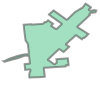

In [100]:
df['geometry'][15391]

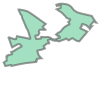

In [106]:
df['geometry'][14669]

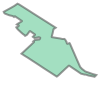

In [99]:
df['geometry'][14676]

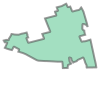

In [107]:
df['geometry'][14743]

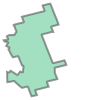

In [108]:
df['geometry'][14772]

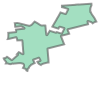

In [109]:
df['geometry'][14830]

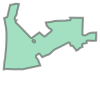

In [110]:
df['geometry'][14826]

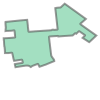

In [111]:
df['geometry'][14675]

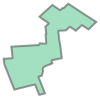

In [105]:
df['geometry'][14818]

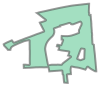

In [112]:
df['geometry'][14934]

In [116]:
geo_data_0 = df[(df['서비스_업종_코드_명']=='한식음식점') & (df['자치구']=='강북구') & (df['cluster']==0)]
geo_data_0

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,총_상주인구_수,총_직장_인구_수,유사_업종_점포_수,집객시설수,교통시설수,당월_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수)
14669,강북구,14670,한식음식점,4771831.00,13313,1460,51,9.0,2.0,2.410716e+09,0,"MULTIPOLYGON (((127.01893 37.64399, 127.01893 ...",5,4,4,5,4.666667
14675,강북구,14676,한식음식점,2597662.25,8589,2069,42,0.0,0.0,2.665003e+09,0,"POLYGON ((127.01766 37.63939, 127.01767 37.639...",1,4,4,1,5.000000
14676,강북구,14677,한식음식점,4702534.00,10832,412,63,0.0,0.0,1.654932e+09,0,"POLYGON ((127.02578 37.64412, 127.02578 37.644...",1,3,4,1,4.333333
14743,강북구,14744,한식음식점,3902719.75,8990,858,39,0.0,0.0,1.467233e+09,0,"POLYGON ((127.02359 37.61938, 127.02360 37.619...",1,3,4,1,4.666667
14772,강북구,14773,한식음식점,3366536.50,9399,487,40,0.0,0.0,1.766675e+09,0,"POLYGON ((127.02036 37.62658, 127.02036 37.626...",1,4,4,1,4.333333
14790,강북구,14791,한식음식점,1533236.75,3439,306,12,23.0,3.0,1.862879e+08,0,"POLYGON ((127.01532 37.62207, 127.01532 37.622...",5,1,2,5,3.333333
14818,강북구,14819,한식음식점,2558709.00,8103,1409,82,0.0,0.0,2.863356e+09,0,"POLYGON ((127.02339 37.63363, 127.02339 37.633...",1,4,5,1,4.666667
14823,강북구,14824,한식음식점,701345.75,2834,114,25,15.0,5.0,1.174529e+09,0,"POLYGON ((127.01120 37.65429, 127.01120 37.654...",5,3,3,5,3.000000
14826,강북구,14827,한식음식점,2830131.00,4067,199,23,0.0,0.0,2.111688e+08,0,"POLYGON ((127.02194 37.61286, 127.02194 37.612...",1,1,3,1,3.666667
14830,강북구,14831,한식음식점,2834160.50,8988,596,54,0.0,0.0,1.588802e+09,0,"POLYGON ((127.01324 37.62871, 127.01325 37.628...",1,3,4,1,4.333333


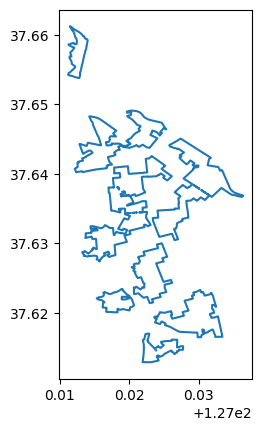

AttributeError: 'MultiPolygon' object has no attribute 'count'

In [117]:
from shapely.ops import unary_union
import matplotlib.pyplot as plt
# geo_data_0 = df[(df['서비스_업종_코드_명']=='한식음식점') & (df['자치구']=='강북구')]
mergedPolys = unary_union(geo_data_0['geometry'])

gpd.GeoSeries([mergedPolys]).boundary.plot()
plt.show()

print(mergedPolys.count())